In [95]:
import yfinance as yf
import pandas as pd
import functions as f
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
    
# List of international tickers for the portfolio

tickers = ['BP.L', 'VOD.L', 'ULVR.L', 'AZN.L', 'HSBA.L', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'JPM']
start_date = "2018-01-01"
end_date = "2023-01-01"

# Download adjusted close prices from Yahoo Finance for a 5-year range
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
benchmark_data = yf.download("URTH", start=start_date, end=end_date)['Adj Close']

benchmark_data.tail()
benchmark_data.shape[0]

[                       0%                       ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


1259

In [97]:
all_data = pd.concat([data, benchmark_data], axis=1, join="inner")
all_data

Ticker,AAPL,AMZN,AZN.L,BP.L,GOOG,HSBA.L,JPM,MSFT,ULVR.L,VOD.L,URTH
Date,,,,,,,,,,,
2018-01-02 00:00:00+00:00,40.568924,59.450500,4202.677734,355.833954,53.119549,532.506348,88.566353,79.792931,3207.189453,135.358383,78.823822
2018-01-03 00:00:00+00:00,40.561855,60.209999,4252.896973,360.440887,53.991409,531.323303,88.656601,80.164268,3217.893555,135.155731,79.294395
2018-01-04 00:00:00+00:00,40.750275,60.479500,4257.012207,364.428986,54.186928,533.202271,89.926651,80.869820,3227.803223,136.226791,79.649536
2018-01-05 00:00:00+00:00,41.214233,61.457001,4284.180176,364.153900,54.976486,531.392761,89.349358,81.872444,3244.850342,137.095200,80.279915
2018-01-08 00:00:00+00:00,41.061142,62.343498,4242.194336,362.641235,55.211411,527.564819,89.481316,81.956001,3244.058350,137.587326,80.084610
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,130.631348,85.250000,10771.509766,439.124603,89.589981,432.447571,124.506897,235.345551,3962.518066,69.973923,106.638550
2022-12-27 00:00:00+00:00,128.818405,83.040001,NaN,NaN,87.714592,NaN,124.943169,233.600662,NaN,NaN,106.385201
2022-12-28 00:00:00+00:00,124.865585,81.820000,10783.011719,440.500000,86.248192,438.972839,125.625999,231.205109,3954.525391,70.449303,105.108734


In [99]:
missing_data = all_data.isnull().sum()
print("Missing values per ticker:\n", missing_data)

Missing values per ticker:
 Ticker
AAPL       0
AMZN       0
AZN.L     25
BP.L      30
GOOG       0
HSBA.L    25
JPM        0
MSFT       0
ULVR.L    25
VOD.L     25
URTH       0
dtype: int64


In [101]:
print(type(all_data))

<class 'pandas.core.frame.DataFrame'>


In [103]:
# Total number of rows before dropping missing values
total_rows = all_data.shape[0]
print(f"Total number of trading days: {total_rows}")

# Sum of missing values across all tickers
total_missing = all_data.isnull().sum().sum()
print(f"Total missing values across all tickers: {total_missing}")

Total number of trading days: 1259
Total missing values across all tickers: 130


In [107]:
# Drop rows with any missing values
data_cleaned = all_data.dropna()
print(f"Number of trading days after dropping missing values: {data_cleaned.shape[0]}")

Number of trading days after dropping missing values: 1229


In [109]:
# Calculate the percentage of data retained after dropping missing values
data_cleaned = all_data.dropna()
retained_rows = data_cleaned.shape[0]
data_retained_percentage = (retained_rows / total_rows) * 100
print(f"Data retained after dropping missing values: {data_retained_percentage:.2f}%")

Data retained after dropping missing values: 97.62%


In [111]:
# Separate portfolio and benchmark data from the cleaned data
aligned_portfolio_data = data_cleaned[tickers]
aligned_benchmark_data = data_cleaned["URTH"]

# Calculate daily returns
portfolio_returns = data_cleaned.pct_change().dropna()
benchmark_returns = aligned_benchmark_data.pct_change().dropna()

In [117]:
#Define periods per year for daily data
periods_per_year = 252

#Calculate annualized expected returns and covariance matrix
rets = f.annualize_rets(portfolio_returns, periods_per_year)
cov_m = portfolio_returns.cov() * periods_per_year

# Calculate annualized return and volatility for the benchmark
benchmark_ann_return = (1 + benchmark_returns.mean()) ** periods_per_year - 1
benchmark_ann_vol = benchmark_returns.std() * np.sqrt(periods_per_year)

In [121]:
benchmark_ann_return

0.08725885965148739

In [10]:
cov_m

Ticker,AAPL,AMZN,AZN.L,BP.L,GOOG,HSBA.L,JPM,MSFT,ULVR.L,VOD.L
Ticker,,,,,,,,,,
AAPL,0.116387,0.081095,0.012078,0.022509,0.075784,0.016221,0.051675,0.082936,0.010091,0.015681
AMZN,0.081095,0.132550,0.010072,0.009589,0.079550,0.010897,0.037558,0.081982,0.007723,0.012226
AZN.L,0.012078,0.010072,0.062565,0.016958,0.009480,0.014131,0.004619,0.013801,0.018287,0.018736
BP.L,0.022509,0.009589,0.016958,0.131359,0.023949,0.052782,0.056282,0.019424,0.012740,0.039328
GOOG,0.075784,0.079550,0.009480,0.023949,0.101044,0.017024,0.050413,0.080521,0.009887,0.021142
HSBA.L,0.016221,0.010897,0.014131,0.052782,0.017024,0.077444,0.045631,0.014886,0.013830,0.032300
JPM,0.051675,0.037558,0.004619,0.056282,0.050413,0.045631,0.106376,0.051289,0.009665,0.033888
MSFT,0.082936,0.081982,0.013801,0.019424,0.080521,0.014886,0.051289,0.099071,0.011792,0.017485
ULVR.L,0.010091,0.007723,0.018287,0.012740,0.009887,0.013830,0.009665,0.011792,0.047697,0.019138


In [11]:
risk_free_rate = 0.03

In [123]:
# Calculate Sharpe Ratio for the benchmark
benchmark_sharpe = (benchmark_ann_return - risk_free_rate) / benchmark_ann_vol

optimal_weights_msr = f.msr(risk_free_rate, rets, cov_m)
print("Optimal weights for maximum Sharpe ratio portfolio:", optimal_weights_msr)

Optimal weights for maximum Sharpe ratio portfolio: [2.44209302e-01 5.19712311e-16 5.49172055e-01 5.52672057e-17
 0.00000000e+00 0.00000000e+00 1.04408669e-16 2.06618642e-01
 0.00000000e+00 9.23740251e-17 0.00000000e+00]


In [13]:
optimal_weights_gmv = f.gmv(cov_m)
print("Optimal weights for global minimum variance portfolio:", optimal_weights_gmv)

Optimal weights for global minimum variance portfolio: [0.02822023 0.07542832 0.22542783 0.01866842 0.0554638  0.13073547
 0.04403446 0.         0.34192603 0.08009544]


In [14]:
n_points = 100
# Calculate annualized expected returns and covariance matrix
rets = f.annualize_rets(returns, periods_per_year)
cov_m = returns.cov() * periods_per_year

# Optimal Weights for MSR and GMV
optimal_weights_msr = f.msr(risk_free_rate, rets, cov_m)
optimal_weights_gmv = f.gmv(cov_m)

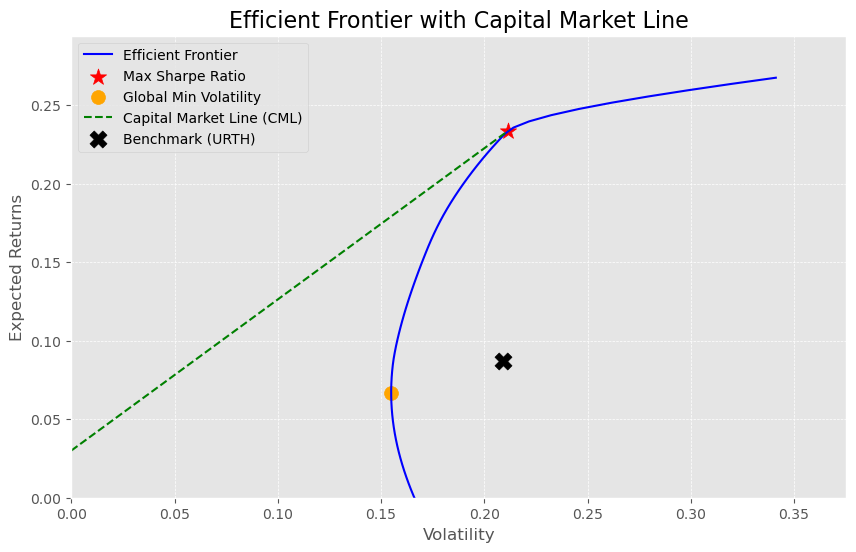

In [125]:
#Calculate Efficient Frontier Points Manually
target_returns = np.linspace(rets.min(), rets.max(), n_points)
frontier_vols = []
frontier_returns = []

for target_return in target_returns:
    weights = f.minimize_vol(target_return, rets, cov_m)
    vol = f.portfolio_vol(weights, cov_m)
    ret = f.portfolio_return(weights, rets)
    frontier_vols.append(vol)
    frontier_returns.append(ret)

#Calculate Max Sharpe Ratio (MSR) and Global Minimum Variance (GMV) Portfolio Points
optimal_weights_msr = f.msr(risk_free_rate, rets, cov_m)
optimal_weights_gmv = f.gmv(cov_m)

msr_volatility = f.portfolio_vol(optimal_weights_msr, cov_m)
msr_return = f.portfolio_return(optimal_weights_msr, rets)
gmv_volatility = f.portfolio_vol(optimal_weights_gmv, cov_m)
gmv_return = f.portfolio_return(optimal_weights_gmv, rets)

#Plot Efficient Frontier and Portfolios
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the efficient frontier
ax.plot(frontier_vols, frontier_returns, linestyle='-', color='blue', label="Efficient Frontier")

# Plot MSR and GMV portfolios with custom markers
plt.scatter(msr_volatility, msr_return, color="red", marker="*", s=150, label="Max Sharpe Ratio")
plt.scatter(gmv_volatility, gmv_return, color="orange", marker="o", s=100, label="Global Min Volatility")

# Plot Capital Market Line (CML)
cml_x = [0, msr_volatility]
cml_y = [risk_free_rate, msr_return]
plt.plot(cml_x, cml_y, color="green", linestyle="--", linewidth=1.5, label="Capital Market Line (CML)")

#Add Benchmark Point to Plot
plt.scatter(benchmark_ann_vol, benchmark_ann_return, color="black", marker="X", s=150, label="Benchmark (URTH)")

# Set axis labels, title, and legend
ax.set_title("Efficient Frontier with Capital Market Line", fontsize=16)
ax.set_xlabel("Volatility", fontsize=12)
ax.set_ylabel("Expected Returns", fontsize=12)
ax.legend(loc="upper left")
ax.grid(True, linestyle='--', linewidth=0.5)

# Set limits for better visualization (adjust as needed)
ax.set_xlim(0, max(frontier_vols) * 1.1)
ax.set_ylim(0, max(frontier_returns) * 1.1)

# Show the plot
plt.show()

In [19]:
window = 252  # 1 years of daily data
periods_per_year = 252  # Annualization factor for daily data
risk_free_rate = 0.03  # Annual risk-free rate


# Calculate rolling weights for MSR and GMV
msr_weights = f.rolling_portfolio_weights(returns, window, portfolio_type="msr", risk_free_rate=risk_free_rate, periods_per_year=periods_per_year)
gmv_weights = f.rolling_portfolio_weights(returns, window, portfolio_type="gmv", periods_per_year=periods_per_year)

In [133]:
# Calculate portfolio returns by applying the weights to the asset returns
msr_returns = (msr_weights * returns.loc[msr_weights.index]).sum(axis=1)
gmv_returns = (gmv_weights * returns.loc[gmv_weights.index]).sum(axis=1)


# Combine the returns into a single DataFrame for comparison
portfolio_returns = pd.DataFrame({
    "MSR Portfolio": msr_returns,
    "GMV Portfolio": gmv_returns,
    "Benchmark Portfolio": benchmark_returns
})


In [135]:
portfolio_returns

,MSR Portfolio,GMV Portfolio,Benchmark Portfolio
Date,,,
2018-01-03 00:00:00+00:00,NaN,NaN,0.005970
2018-01-04 00:00:00+00:00,NaN,NaN,0.004479
2018-01-05 00:00:00+00:00,NaN,NaN,0.007914
2018-01-08 00:00:00+00:00,NaN,NaN,-0.002433
2018-01-09 00:00:00+00:00,NaN,NaN,0.002328
...,...,...,...
2022-12-22 00:00:00+00:00,0.001401,-0.005261,-0.012425
2022-12-23 00:00:00+00:00,-0.002803,0.000004,0.005051
2022-12-28 00:00:00+00:00,0.001547,-0.000827,-0.014346


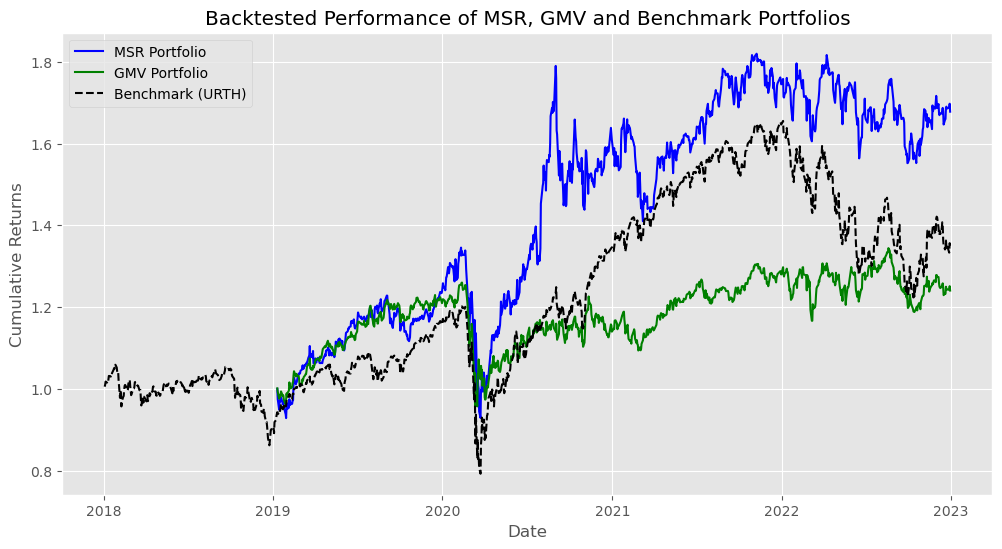

In [137]:
# Calculate cumulative returns for both portfolios
msr_cumulative_returns = (1 + msr_returns).cumprod()
gmv_cumulative_returns = (1 + gmv_returns).cumprod()

#Calculate cumulative returns for the benchmark
benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()

# Plot cumulative returns for MSR, GMV and Benchmark portfolios
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(msr_cumulative_returns, label='MSR Portfolio', color='blue')
plt.plot(gmv_cumulative_returns, label='GMV Portfolio', color='green')
plt.plot(benchmark_cumulative_returns, label='Benchmark (URTH)', color='black', linestyle="--")
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title('Backtested Performance of MSR, GMV and Benchmark Portfolios')
plt.show()


In [147]:
# Generate the summary statistics
performance_summary = f.summary_stats(portfolio_returns, riskfree_rate=risk_free_rate,  periods_per_year=periods_per_year)
performance_summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
MSR Portfolio,0.112033,0.267661,-0.169884,12.630180,0.024577,NaN,0.322121,-0.309167
GMV Portfolio,0.045272,0.170993,-0.244406,11.213806,0.016381,NaN,0.122829,-0.240053
Benchmark Portfolio,0.063605,0.209028,-0.779182,16.306978,0.020548,0.032212,0.156093,-0.340090


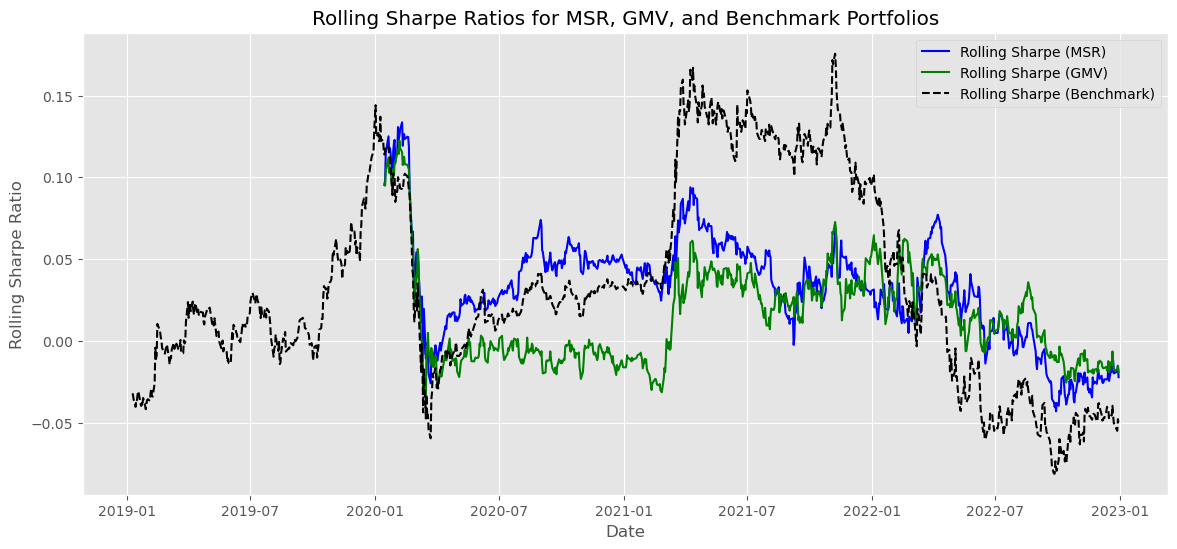

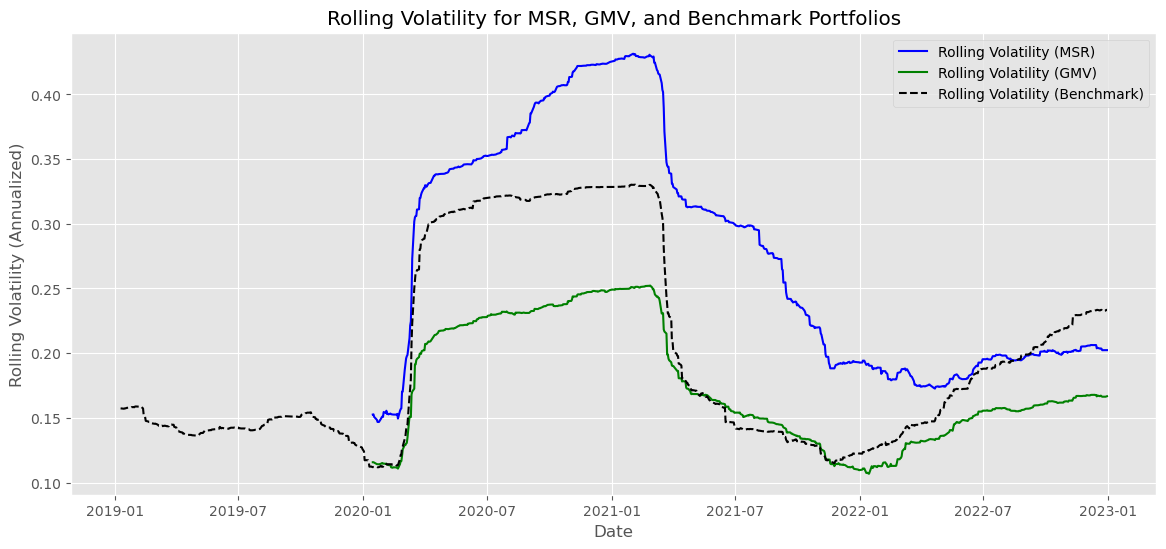

In [151]:
# Define the rolling window in days
rolling_window = 252  # 1-year rolling window for daily data

# Calculate the rolling mean and volatility
rolling_msr_returns = portfolio_returns["MSR Portfolio"].rolling(rolling_window)
rolling_gmv_returns = portfolio_returns["GMV Portfolio"].rolling(rolling_window)
rolling_benchmark_returns = portfolio_returns["Benchmark Portfolio"].rolling(rolling_window)

# Calculate rolling Sharpe Ratios
rolling_msr_sharpe = (rolling_msr_returns.mean() - risk_free_rate / 252) / rolling_msr_returns.std()
rolling_gmv_sharpe = (rolling_gmv_returns.mean() - risk_free_rate / 252) / rolling_gmv_returns.std()
rolling_benchmark_sharpe = (rolling_benchmark_returns.mean() - risk_free_rate / 252) / rolling_benchmark_returns.std()

# Calculate rolling volatilities
rolling_msr_vol = rolling_msr_returns.std() * np.sqrt(252)
rolling_gmv_vol = rolling_gmv_returns.std() * np.sqrt(252)
rolling_benchmark_vol = rolling_benchmark_returns.std() * np.sqrt(252)

# Plot Rolling Sharpe Ratios for MSR, GMV, and Benchmark
plt.figure(figsize=(14, 6))
plt.plot(rolling_msr_sharpe, label='Rolling Sharpe (MSR)', color='blue')
plt.plot(rolling_gmv_sharpe, label='Rolling Sharpe (GMV)', color='green')
plt.plot(rolling_benchmark_sharpe, label='Rolling Sharpe (Benchmark)', color='black', linestyle="--")
plt.xlabel('Date')
plt.ylabel('Rolling Sharpe Ratio')
plt.legend()
plt.title('Rolling Sharpe Ratios for MSR, GMV, and Benchmark Portfolios')
plt.show()

# Plot Rolling Volatility for MSR, GMV, and Benchmark
plt.figure(figsize=(14, 6))
plt.plot(rolling_msr_vol, label='Rolling Volatility (MSR)', color='blue')
plt.plot(rolling_gmv_vol, label='Rolling Volatility (GMV)', color='green')
plt.plot(rolling_benchmark_vol, label='Rolling Volatility (Benchmark)', color='black', linestyle="--")
plt.xlabel('Date')
plt.ylabel('Rolling Volatility (Annualized)')
plt.legend()
plt.title('Rolling Volatility for MSR, GMV, and Benchmark Portfolios')
plt.show()

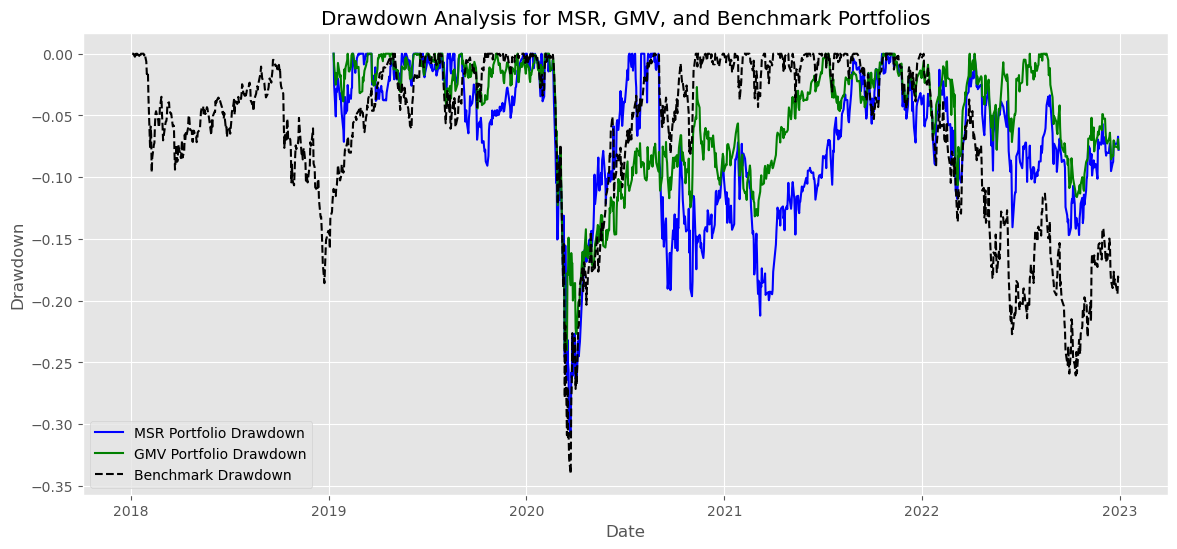

In [153]:
# Calculate drawdowns for both MSR and GMV portfolios
msr_drawdown_data = f.drawdown(portfolio_returns["MSR Portfolio"])
gmv_drawdown_data = f.drawdown(portfolio_returns["GMV Portfolio"])
benchmark_drawdown_data = f.drawdown(portfolio_returns["Benchmark Portfolio"])

# Extract the 'Drawdown' column for plotting
msr_drawdown = msr_drawdown_data["Drawdown"]
gmv_drawdown = gmv_drawdown_data["Drawdown"]
benchmark_drawdown = benchmark_drawdown_data["Drawdown"]

# Plot drawdowns for MSR, GMV, and Benchmark portfolios
plt.figure(figsize=(14, 6))
plt.plot(msr_drawdown, label='MSR Portfolio Drawdown', color='blue')
plt.plot(gmv_drawdown, label='GMV Portfolio Drawdown', color='green')
plt.plot(benchmark_drawdown, label='Benchmark Drawdown', color='black', linestyle="--")
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.title('Drawdown Analysis for MSR, GMV, and Benchmark Portfolios')
plt.show()